In [4]:
# load data
import pickle

sweep_dir = '/home/dodd/data/wg_disp/wgparams_sweep_Al2O3_SiO2_2020_03_01_17_50_45/'
with open(sweep_dir+'metadata.dat', 'rb') as f:
    params = pickle.load(f)
ds = np.load(sweep_dir+"data.npy",allow_pickle=True)[()]

# # parameters copied from script
# ########### Parameters ###############
# ### swept parameters
# w_top_list = np.array([1200,1650,2000]) * u.nm
# λ_list = np.linspace(0.78,2.6,20)*u.um
# fact_list = [1.,0.95,1.05]
# ### fixed parameters
# t_core = 730*u.nm # core thickness
# t_etch = 730*u.nm # partial (or complete) etch depth

# ########## Simulation set up ##########
# (Xgrid, Ygrid) = (4, 2) # simulated region in μm
# n_points = 32
# n_bands  = 4
# res      = 64

In [8]:
λ_list = params['λ_list']
w_top_list = params['w_top_list']
fact_list = params['λ_factor_list']

In [9]:
# define constants
π = np.pi
c = u.speed_of_light

# unload dataset
λ = np.outer(fact_list,λ_list.m) * λ_list.units
λ = λ.reshape(λ.shape+(1,))
dλ = λ[0] * 0.05
neff = ds['neff']
ng = ds['ng']

β = neff * 2*π / λ

# Compute β'(λ) and β''(λ)
# lam = np.outer([1, 2], lamList).reshape(2, 6, 1, 1, 1); dlam = lam * 0.05
β1_λ = (β[2] - β[1]) / (2 * dλ)
β2_λ = (β[2] + β[1] - 2*β[0]) / (dλ**2)
# Compute β'(k) and β''(k) (in SI units)  Since k = 2πc/λ and β'(k) = ng/c, these are given by:
#   β'(k)  = -(λ²/2πc) β'(λ)
#   β''(k) = -(λ²/2πc²) ng'(λ)
β1 = -λ**2/(2*π*c) * β1_λ
#beta2 = (lam**2/(2*np.pi*c))**2 * (beta2_lam + (2/lam) * beta1_lam)
β2 = -λ**2/(2*π*c**2) * (ng[2] - ng[1]) / (2*dλ)
D = ( ( 1 / c )  * (ng[2] - ng[1]) / (2*dλ) ).to(u.ps / u.nm / u.km)
#ng = c * beta1

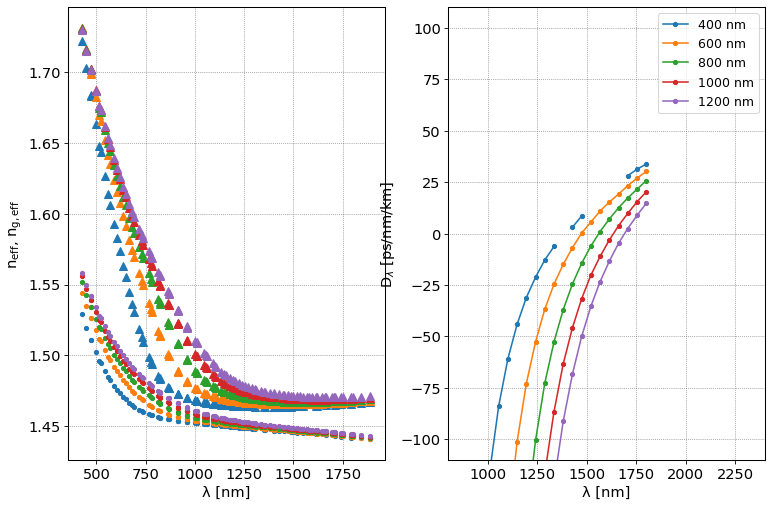

In [12]:
# plot dispersion 
fig,ax = plt.subplots(1,2,figsize=(12,8))

labels = ['1200 nm','1650 nm','2000 nm']
#colors = ['C3','C2','darkblue']

for wind,ww in enumerate(w_top_list):
    color = f'C{wind}'
    label = f'{int(w_top_list[wind].to(u.nm).m)} nm'
    for fact_ind,fact in enumerate(fact_list):
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['neff'][fact_ind,:,wind],'.',color=color)
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['ng'][fact_ind,:,wind],'^',color=color)
    ax[1].plot(λ[0].to(u.nm).m,D[:,wind].m,'.-',color=color,label=label)
    
for a in ax:
    a.set_xlabel('λ [nm]')
    
ax[0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[1].set_ylabel('D$_{λ}$ [ps/nm/km]')

ax[1].set_ylim([-110,110])
ax[1].set_xlim([800,2400])
ax[1].legend()

(800, 2400)

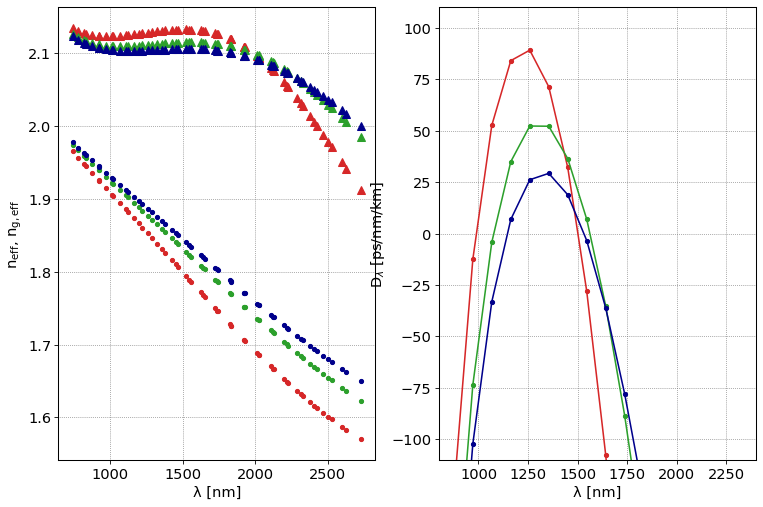

In [65]:
# 4x2 lattice, res = 128
fig,ax = plt.subplots(1,2,figsize=(12,8))

labels = ['1200 nm','1650 nm','2000 nm']
colors = ['C3','C2','darkblue']

for wind,ww in enumerate(w_top_list):
    color=colors[wind]
    for fact_ind,fact in enumerate(fact_list):
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['neff'][fact_ind,:,wind],'.',color=color)
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['ng'][fact_ind,:,wind],'^',color=color)
    ax[1].plot(λ[0].to(u.nm).m,D[:,wind].m,'.-',color=color,label=labels[wind])
    
for a in ax:
    a.set_xlabel('λ [nm]')
    
ax[0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[1].set_ylabel('D$_{λ}$ [ps/nm/km]')

ax[1].set_ylim([-110,110])
ax[1].set_xlim([800,2400])

(800, 2400)

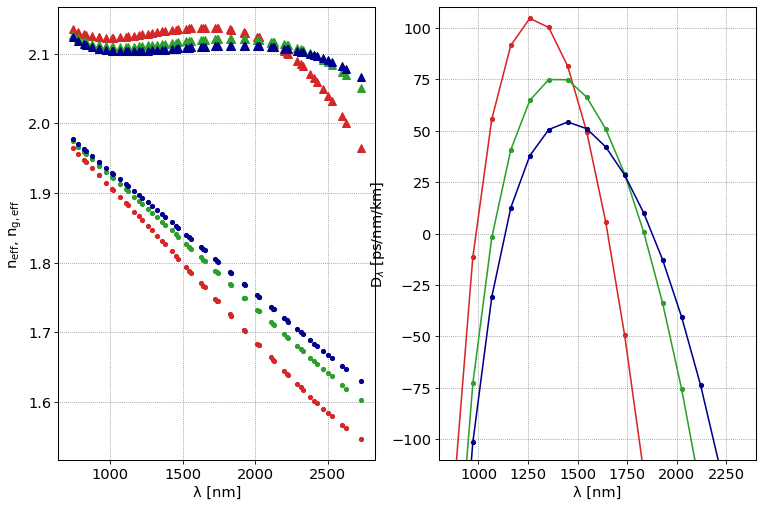

In [68]:
# 4x4 lattice, res = 64
fig,ax = plt.subplots(1,2,figsize=(12,8))

labels = ['1200 nm','1650 nm','2000 nm']
colors = ['C3','C2','darkblue']

for wind,ww in enumerate(w_top_list):
    color=colors[wind]
    for fact_ind,fact in enumerate(fact_list):
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['neff'][fact_ind,:,wind],'.',color=color)
        ax[0].plot(fact*λ_list.to(u.nm).m,ds['ng'][fact_ind,:,wind],'^',color=color)
    ax[1].plot(λ[0].to(u.nm).m,D[:,wind].m,'.-',color=color,label=labels[wind])
    
for a in ax:
    a.set_xlabel('λ [nm]')
    
ax[0].set_ylabel('n$_\mathrm{eff}$, n$_\mathrm{g,eff}$')
# ax[1].set_ylabel('n$_\mathrm{g,eff}$')
ax[1].set_ylabel('D$_{λ}$ [ps/nm/km]')

ax[1].set_ylim([-110,110])
ax[1].set_xlim([800,2400])

In [69]:
test = {'blah': 2, 'wah': 1.}
'blah' in test.keys()

True